# Chlorine Corrections

* Pull data from multiple GEANT4 simulations
* Determine interference corrections and create figures in Manuscript
* Figures from this code are: 
    * Figure 6
    * Figure S7
    * Figure S8
    * Figure S10

In [68]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl

"""
Plots
"""
mpl.rcParams['font.size'] = 14

In [69]:
import glob
import pandas as pd
"""
Read in csv
"""

'\nRead in csv\n'

In [21]:
df = pd.DataFrame(pd.read_csv(file_list[0], skiprows = 11))
df = df.set_axis(["Neutron_energy",
                    "tZ", "tA", 
                        "Z", "A", 
                    "Nuclide_energy", 
                     "time"], axis = 1, inplace = False)
for i in range(0, 14):
    data = pd.read_csv(file_list[i], skiprows = 11)
    df1 = pd.DataFrame(data)
    df1 = df1.set_axis(["Neutron_energy",
                    "tZ", "tA", 
                        "Z", "A", 
                    "Nuclide_energy", 
                     "time"], axis = 1, inplace = False)
    df = pd.concat([df, df1])



In [22]:
"""
Chlorine (n,g) corrections
"""

df_cl = df[df['tZ'] == 17]

df_cl36 = df_cl[df_cl['A'] == 36]

df_cl38 = df_cl[df_cl['A'] == 38]

In [23]:
"""
Just Chlorine 
"""
print(df_cl36.shape[0]/df_cl38.shape[0])

241.96623072418504


In [24]:
df_pcl36 = df[df['A'] == 36]
df_pcl38 = df[df['A'] == 38]

df_pcl36 = df_pcl36[df_pcl36['Z'] == 17]
df_pcl38 = df_pcl38[df_pcl38['Z'] == 17]

In [25]:
df_pcl36.shape[0]/df_pcl38.shape[0]

244.93990338164252

In [26]:
def ratios_(x, y): 
    x_err = np.sqrt(x)
    y_err = np.sqrt(y)
    
    ratio = x/y
    
    zz = np.sqrt((x_err/x)**2 + (y_err/y)**2)
    
    ratio_err = ratio * zz
    
    return ratio, ratio_err

In [27]:
Cl_pr, Cl_pr_err = ratios_(df_pcl36.shape[0], df_pcl38.shape[0])

In [28]:
print(Cl_pr, Cl_pr_err)

244.93990338164252 3.4118434297004807


In [29]:
x = df_cl36.shape[0]
y = df_cl38.shape[0]
R_Cl, R_Cl_err = ratios_(x, y)

In [30]:
comb, comb_err = ratios_(df_pcl36.shape[0], df_pcl38.shape[0])

In [31]:
print('P36Cl/38Cl', R_Cl, '+/-', R_Cl_err)

P36Cl/38Cl 241.96623072418504 +/- 3.3875690770412747


In [32]:
"""
K 
"""
df_k = df[df['tZ'] == 19]
df_ar39_k = df_k[df_k['A'] == 39]
df_ar39_k = df_ar39_k[df_ar39_k['Z'] == 18]

In [33]:
y2 = df_ar39_k.shape[0]

In [34]:
"""
(36Ar/39Ar)K
"""
df_ar36 = df_k[df_k['A'] == 36]
df_ar36 = df_ar36[df_ar36['Z'] == 17]

df_ar38 = df_k[df_k['A'] == 38]
df_ar38 = df_ar38[df_ar38['Z'] == 17]

df_ar40 = df_k[df_k['A'] == 40]
df_ar40 = df_ar40[df_ar40['Z'] == 17]

x4 = df_ar36.shape[0]
x5 = df_ar38.shape[0]

r_ar36_39, r_ar36_39_err = ratios_(x4, y2)

In [35]:
print(r_ar36_39, r_ar36_39_err)

0.38656937131169067 0.0027217250201911135


In [36]:
p_36_38_ar, p_36_38_ar_err = ratios_(x4,x5)

In [37]:
print(p_36_38_ar, p_36_38_ar_err)

537.9038461538462 74.66314758161053


In [38]:
"""
Chlorine
"""
df_cl36_k  = df_k[df_k['A'] == 36]
df_cl36_k = df_cl36_k[df_cl36_k ['Z'] == 17]

"""
Chlorine
"""
df_cl38_k  = df_k[df_k['A'] == 38]
df_cl38_k = df_cl38_k[df_cl38_k ['Z'] == 17]

In [39]:
cl36_kn = df_cl36_k.shape[0]
cl38_kn = df_cl38_k.shape[0]

In [40]:
p_36_38_k, p_36_38_k_err = ratios_(cl36_kn,cl38_kn)

In [41]:
print(p_36_38_k, p_36_38_k_err)

537.9038461538462 74.66314758161053


In [42]:
"""
P(36Ar)/P(38Ar)
"""
p36p38_renne = 262.8
p36p38_renne_err = 1.7

p36p38_roddick = 327

p36p38_foland = 320

p36p38_Cl_model = R_Cl
p36p38_Cl_model_err = R_Cl_err 


p36p38_K = p_36_38_k
p36p38_K_err = p_36_38_k_err

In [43]:
p36p38_array = np.array([p36p38_renne, 
                        p36p38_roddick, 
                        p36p38_foland,
                        p36p38_Cl_model, 
                        p36p38_K])

p36p38_array_err = np.array([p36p38_renne_err, 
                        0, 
                        0,
                        p36p38_Cl_model_err, 
                            p36p38_K_err])

p38p36_labels = ['Renne', 'Roddick', 
         'Foland', 'Cl - derived', 
                'K - derived']

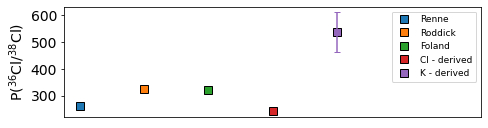

In [44]:
fig,(ax1)=plt.subplots(1,1, figsize = (7,2))
for i in range(len(p36p38_array)):
    ax1.errorbar(i*0.2, y = p36p38_array[i], 
                yerr = p36p38_array_err[i],
                 fmt = 's', barsabove = True, 
                capsize = 3.3, 
                markeredgecolor = 'k',
                 markersize = 8,
                label = p38p36_labels[i])
    plt.legend()
    ax1.set_xticks([])
    
    # get handles
    handles, labels = ax1.get_legend_handles_labels()
    # remove the errorbars
    handles = [h[0] for h in handles]
    
    ax1.legend(handles, labels, 
               numpoints=1, ncol = 1, fontsize= 9)
    ax1.set_ylabel('P($^{36}$Cl/$^{38}$Cl)')
    ax1.set_xlim(-0.05, 1.25)
    plt.tight_layout()
#plt.ylim(0, 400)
plt.locator_params(axis = 'y', nbins = 7)
#plt.yscale('log')

In [45]:
delta_t_renne = np.array([0.2317, 0.2806, 
                         0.4153, 0.4180, 0.4202, 0.4203, 
                         0.4208, 0.6258, 
                         0.6259, 0.7767,
                         0.7770, 1.0247, 1.0247,
                         1.0247, 2.5302, 2.5306, 
                         2.5325])


delta_t_renne_2 = np.array([0.000001, 0.2317, 0.2806, 
                         0.4153, 0.4180, 0.4202, 0.4203, 
                         0.4208, 0.6258, 
                         0.6259, 0.7767,
                         0.7770, 1.0247, 1.0247,
                         1.0247, 2.5302, 2.5306, 
                         2.5325])



In [46]:
def ar36_growth(n0, t):
    lamb = np.log(2)/(3.07e5)
    N = n0* 1/(1 -(np.exp(-lamb*t)))
    return N

In [47]:
"""
Initial 36Ar/38Ar
"""
lamb = np.log(2)/(3.07e5)
in_3638Ar_cl = (p36p38_Cl_model)* (1 - np.exp(-lamb*delta_t_renne_2))

in_3638Ar_K = (p36p38_K)* (1 - np.exp(-lamb*delta_t_renne_2))

roddick_3638Ar = 327* (1 - np.exp(-lamb*delta_t_renne_2))

foland_3638Ar = 320* (1 - np.exp(-lamb*delta_t_renne_2))


In [48]:
ar3638Ar_renne = np.array([1.4182e-4, 
                           1.5999e-4,
                           2.4904e-4, 
                           2.39996e-4, 
                          2.549e-4, 
                          2.4713e-4, 
                          3.7356e-4,
                           3.7277e-4,
                           4.6169e-4, 
                           4.5418e-4,
                           6.2264e-4,
                           6.2012e-4,
                           6.0889e-4,
                           5.8564e-4,
                           1.5540e-3,
                           1.5616e-3,
                           1.5130e-3])

In [49]:
m,c = np.polyfit(delta_t_renne , ar3638Ar_renne, 1)
m,c

(0.0006008423486991741, 2.115301680128791e-05)

In [50]:
in_3638Ar_this_study_K = in_3638Ar_K
in_3638Ar_this_study_cl = in_3638Ar_cl

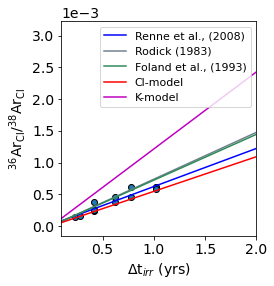

In [51]:
plt.figure(figsize= (4.4,4))
plt.plot(delta_t_renne , ar3638Ar_renne, 'o', 
        markeredgecolor = 'k')
plt.plot(delta_t_renne_2, m*delta_t_renne_2+ c, color = 'b', 
        label = 'Renne et al., (2008)')

plt.plot(delta_t_renne_2, roddick_3638Ar, '-', 
        label = 'Rodick (1983)', 
        color = 'slategrey')

plt.plot(delta_t_renne_2 , foland_3638Ar, '-', 
        label = 'Foland et al., (1993)', 
        color = 'seagreen')

plt.plot(delta_t_renne_2 , in_3638Ar_this_study_cl, '-', 
        label = 'Cl-model', 
        color = 'r')

plt.plot(delta_t_renne_2 , in_3638Ar_this_study_K, '-', 
        label = 'K-model', 
        color = 'm')

plt.legend(fontsize = 11)
plt.ylabel(r'$^{36}$Ar$_{\rm Cl}$/$^{38}$Ar$_{\rmCl}$')
plt.xlabel('$\Delta$t$_{irr}$ (yrs)')
plt.xlim(0.1, 2)
plt.tight_layout()
plt.ticklabel_format(style = 'sci', axis = 'y', 
                      scilimits=(0,0))


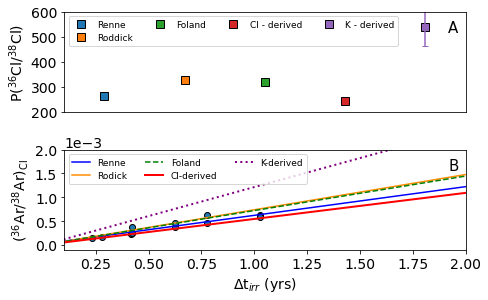

In [52]:
fig,ax = plt.subplots(2,1, figsize = (7, 4.4))
for i in range(len(p36p38_array)):
    ax[0].errorbar(i*0.2, y = p36p38_array[i], 
                yerr = p36p38_array_err[i],
                 fmt = 's', barsabove = True, 
                capsize = 3.3, 
                markeredgecolor = 'k',
                 markersize = 8,
                label = p38p36_labels[i])
    ax[0].set_xticks([])
    
    # get handles
    handles, labels = ax[0].get_legend_handles_labels()
    # remove the errorbars
    handles = [h[0] for h in handles]
    ax[0].legend(handles, labels, 
               numpoints=1, ncol = 4, fontsize= 9)
    ax[0].set_ylabel('P($^{36}$Cl/$^{38}$Cl)')
    ax[0].set_xlim(-0.05, 1.2)
ax[0].locator_params(axis = 'y', nbins = 7)

ax[1].plot(delta_t_renne , ar3638Ar_renne, 'o', 
        markeredgecolor = 'k')
ax[1].plot(delta_t_renne_2, m*delta_t_renne_2+ c, color = 'b', 
        label = 'Renne')

ax[1].plot(delta_t_renne_2, roddick_3638Ar, '-', 
        label = 'Rodick', 
        color = 'darkorange')

ax[1].plot(delta_t_renne_2 , foland_3638Ar,
        label = 'Foland', 
        color = 'green', 
          ls = '--')

ax[1].plot(delta_t_renne_2 , in_3638Ar_this_study_cl, '-', 
        label = 'Cl-derived', 
        color = 'r', 
          lw = 2)

ax[1].plot(delta_t_renne_2 , in_3638Ar_this_study_K, ':', 
        label = 'K-derived', 
        color = 'purple', 
          lw = 2)

ax[1].legend(fontsize = 9, ncol = 3)
ax[1].set_ylabel(r'($^{36}$Ar/$^{38}$Ar)$_{\rmCl}$')
ax[1].set_xlabel('$\Delta$t$_{irr}$ (yrs)')
ax[1].set_xlim(0.1, 2)
ax[1].ticklabel_format(style = 'sci', axis = 'y', 
                      scilimits=(0,0))


ax[1].locator_params(axis = 'y', nbins = 6)
ax[1].set_ylim(-1e-4, 2e-3)
ax[0].text(0.856, 520, 'A', fontsize = 15)
ax[1].text(1.92, 1.58e-3, 'B', fontsize = 15)

ax[0].set_ylim(200, 600)
ax[0].set_xlim(-0.1, 0.9)

plt.tight_layout()
#ax[1].set_yscale('symlog')
#plt.savefig('/Users/jackcarter/Desktop/Neutron_Irradiation_Paper/Plots_Latest_v2/Figure9_Cl_corection_comparison.pdf')

In [53]:
age1 = 1
age2 = age1*0.998

ages = np.array([age1, age2])
prod = np.array([263, 320])

In [54]:
m,c = np.polyfit(prod, ages, 1)

In [55]:
xx = np.linspace(0, 700, 100)

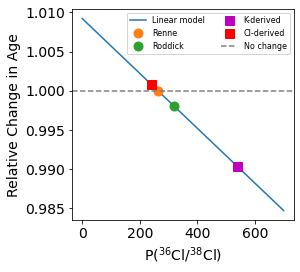

In [56]:
age1 = 1
age2 = age1*0.998

ages = np.array([age1, age2])
prod = np.array([263, 320])
fig = plt.figure(figsize = (4.4,4))
plt.plot(xx, m*xx + c, 
        label = 'Linear model')
plt.plot(prod[0], ages[0], 'o', 
        label = 'Renne', 
        markersize = 9)
plt.plot(prod[1], ages[1], 'o', 
        label = 'Roddick', 
        markersize = 9)

plt.plot(p_36_38_k, m*p_36_38_k + c, 's', 
        label = 'K-derived', 
        markersize = 9, 
        color = 'm')

plt.plot(238, m*238 + c, 's', 
        label = 'Cl-derived', 
        markersize = 9, 
        color = 'r')
plt.xlabel('P($^{36}$Cl/$^{38}$Cl)')
plt.ylabel('Relative Change in Age')
plt.axhline(1, ls = '--', label = 'No change', 
           color = 'grey')
plt.legend(fontsize = 8, loc = 1, ncol = 2)
#plt.xlim(160, 500)
#plt.ylim(0.99, 1.006)
plt.tight_layout()
plt.savefig('/Users/jackcarter/Desktop/Neutron_Irradiation_Paper/Plots_Latest_v2/Figure_S2_Chlorine correciton.pdf')

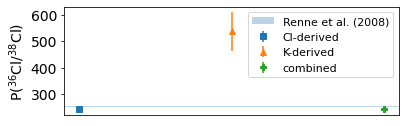

In [57]:
fig, ax = plt.subplots(1, 1, figsize= (6, 2))
plt.errorbar(1, y = p36p38_Cl_model, 
            yerr = p36p38_Cl_model_err, fmt = 's', 
            label = 'Cl-derived')

plt.errorbar(2, y = p_36_38_k, 
            yerr = p_36_38_k_err, fmt = '^', 
            label = 'K-derived'); 

plt.errorbar(3, y = comb, 
            yerr = comb_err , fmt = 'P', 
            label = 'combined'); 


plt.ylabel('P($^{36}$Cl/$^{38}$Cl)')
plt.xticks([])
plt.locator_params(axis = 'y', nbins = 6)
#plt.ylim(200, 600)
plt.axhspan(252.7 - 1.8, 
           252.7 + 1.8, 
           alpha = 0.3, 
           label = 'Renne et al. (2008)')
plt.legend(fontsize = 11)
plt.savefig('/Users/jackcarter/Desktop/Neutron_Irradiation_Paper/Plots_Latest_v2/Figure_S_Production_comparison.pdf')#plt.yscale('log')

In [58]:
df_cl36_k.shape[0]

27971

In [59]:
df_pcl36.shape[0]/df_cl36_k.shape[0]


45.317078402631296

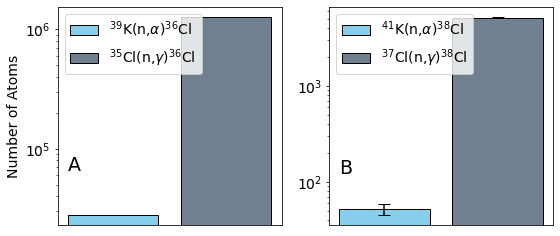

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (8,3.5))

ax[0].bar(1, df_cl36_k.shape[0], 
          yerr = np.sqrt(df_cl36_k.shape[0]), 
         capsize = 6, 
         edgecolor = 'k', 
         color = 'skyblue', 
         label = r'$^{39}$K(n,$\alpha$)$^{36}$Cl')
ax[0].bar(2, df_pcl36.shape[0], 
          yerr = np.sqrt(df_pcl36.shape[0]), 
         capsize = 6, 
         edgecolor = 'k', 
         color = 'slategrey', 
         label = r'$^{35}$Cl(n,$\gamma$)$^{36}$Cl')


ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_ylabel('Number of Atoms')


ax[1].bar(1, df_cl38_k.shape[0], 
          yerr = np.sqrt(df_cl38_k.shape[0]), 
         capsize = 6, 
         edgecolor = 'k', 
         color = 'skyblue', 
         label = r'$^{41}$K(n,$\alpha$)$^{38}$Cl')
ax[1].bar(2, df_pcl38.shape[0], 
          yerr = np.sqrt(df_pcl38.shape[0]), 
         capsize = 6, 
         edgecolor = 'k', 
         color = 'slategrey', 
         label = r'$^{37}$Cl(n,$\gamma$)$^{38}$Cl')

ax[0].legend()
ax[1].legend()
ax[0].set_xticks([]);
ax[1].set_xticks([]);

ax[0].text(0.6, 0.65e5, 'A', fontsize = 19)
ax[1].text(0.6, 120, 'B', fontsize = 19)

plt.tight_layout()


In [61]:
"""
Ar - K Interference
"""
df_ar38_k = df_k[df_k['A'] == 38]
df_ar38_k = df_ar38_k[df_ar38_k['Z'] == 18]


df_ar37_k = df_k[df_k['A'] == 37]
df_ar37_k = df_ar37_k[df_ar37_k['Z'] == 18]


df_ar40_k = df_k[df_k['A'] == 40]
df_ar40_k = df_ar40_k[df_ar40_k['Z'] == 18]


df_ar39_k = df_k[df_k['A'] == 39]
df_ar39_k = df_ar39_k[df_ar39_k['Z'] == 18]

In [62]:
ar40_39_k,ar40_39_k_err = ratios_(df_ar40_k.shape[0], 
                                  df_ar39_k.shape[0]) 

In [63]:
print(ar40_39_k,ar40_39_k_err )

0.0006771977832137872 9.677529183223224e-05


In [64]:
ar38_39_k,ar38_39_k_err = ratios_(df_ar38_k.shape[0], 
                                  df_ar39_k.shape[0]) 

In [65]:
print(ar38_39_k,ar38_39_k_err)

0.015934878449908093 0.0004730064214305767


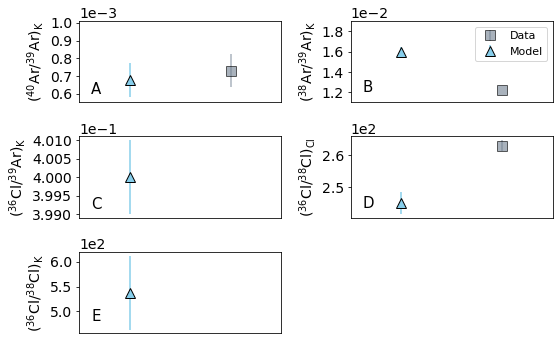

In [67]:
"""
Interferences 
"""
fig, ax = plt.subplots(3, 2, figsize = (8, 5))

ax[0,0].set_xticks([]); 
ax[0,1].set_xticks([]); 
ax[1,0].set_xticks([]); 
ax[1,1].set_xticks([]); 
ax[2,0].set_xticks([]); 
ax[2,1].set_xticks([]); 

ax[0,0].set_ylabel(r'($^{40}$Ar/$^{39}$Ar)$_{\rm K}$')
ax[0,1].set_ylabel(r'($^{38}$Ar/$^{39}$Ar)$_{\rm K}$')
ax[1,0].set_ylabel(r'($^{36}$Cl/$^{39}$Ar)$_{\rm K}$')
ax[1,1].set_ylabel(r'($^{36}$Cl/$^{38}$Cl)$_{\rm Cl}$')
ax[2,0].set_ylabel(r'($^{36}$Cl/$^{38}$Cl)$_{\rm K}$')

ax[2,1].remove()
"""
Plotting  Data
"""

ax[0,0].errorbar(x = 2, y = 7.30e-4, 
                yerr = 0.92e-4,  fmt = 's', 
                label = 'Data', 
                color = 'slategrey', 
                markeredgecolor = 'k', 
                alpha = 0.6, 
                markersize = 10)

ax[0,1].errorbar(x = 2, y = 1.22e-2, 
                yerr = 0.001e-2,  fmt = 's', 
                color = 'slategrey', 
                markeredgecolor = 'k', 
                alpha = 0.6, 
                label = 'Data', 
                markersize = 10)


ax[1,1].errorbar(x = 2, y = 263, 
                yerr = 1.7,  fmt = 's', 
                color = 'slategrey', 
                markeredgecolor = 'k', 
                alpha = 0.6, 
                markersize = 10)


"""
Plotting Model 
"""

ax[0,0].errorbar(x = 1, y = ar40_39_k, 
                yerr = ar40_39_k_err,  fmt = '^', 
                color = 'skyblue', 
                markeredgecolor = 'k', 
                alpha = 1, 
                label = 'Model', 
                markersize = 10)


ax[0,1].errorbar(x = 1, y = ar38_39_k, 
                yerr = ar38_39_k_err,  fmt = '^', 
                color = 'skyblue', 
                markeredgecolor = 'k', 
                alpha = 1, 
                label = 'Model', 
                markersize = 10)


ax[1,1].errorbar(x = 1, y = Cl_pr,  
                yerr = Cl_pr_err,  fmt = '^', 
                color = 'skyblue', 
                markeredgecolor = 'k', 
                alpha = 1, 
                markersize = 10)

ax[1,0].errorbar(x = 1, y = 0.4, 
                yerr = 0.001,  fmt = '^', 
                color = 'skyblue', 
                markeredgecolor = 'k', 
                alpha = 1, 
                markersize = 10)

ax[2,0].errorbar(x = 1, y = p36p38_K, 
                yerr = p36p38_K_err,  fmt = '^', 
                color = 'skyblue', 
                markeredgecolor = 'k', 
                alpha = 1, 
                markersize = 10)

ax[0,0].set_xlim(0.5, 2.5)
ax[0,1].set_xlim(0.5, 2.5)
ax[1,0].set_xlim(0.5, 2.5)
ax[1,1].set_xlim(0.5, 2.5)
ax[2,0].set_xlim(0.5, 2.5)

ax[0,0].locator_params(axis = 'y',nbins = 5)
ax[0,1].locator_params(axis = 'y',nbins = 5)
ax[1,0].locator_params(axis = 'y',nbins = 5)
ax[1,1].locator_params(axis = 'y',nbins = 5)
ax[2,0].locator_params(axis = 'y',nbins = 5)

ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[2,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[0,1].legend(fontsize = 11, loc = 1)
ax[0,1].set_ylim(1.1e-2, 1.9e-2)
ax[0,0].set_ylim(5.5e-4, 1.01e-3)

ax[0,0].text(0.62, 0.6e-3, 'A', fontsize= 15)
ax[0,1].text(0.62, 1.2e-2, 'B', fontsize= 15)
ax[1,0].text(0.62, 3.9915e-1, 'C', fontsize= 15)
ax[1,1].text(0.62, 243.5, 'D', fontsize= 15)
ax[2,0].text(0.62, 480, 'E', fontsize= 15)

plt.tight_layout()
